Import Library
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.datasets import fetch_california_housing

Data Loading
---



Data yang Digunakan berasal dari dataset SKLearn yaitu California Housing

In [ ]:
data = fetch_california_housing(as_frame=True)
df = data.frame

print(df.shape)  # Output: (20640, 9)
df

(20640, 9)


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

Sebelum masuk ke tahapan EDA, mari kita telaah dulu variabel yang ada di dataset:
- MedInc: Median income di blok tersebut
- HouseAge: Umur median rumah
- AveRooms: Rata-rata jumlah kamar per rumah tangga
- AveBedrms: Rata-rata jumlah kamar tidur
- Population: Jumlah populasi di area
- AveOccup: Rata-rata jumlah penghuni per rumah
- Latitude: Koordinat geografis (lintang)
- Longitude: Koordinat geografis (bujur)
- MedHouseVal: Median nilai rumah di blok tersebut (dalam satuan $100.000) -> Fitur Target

Dikarenakan variabel Latitude dan Longitude merupakan variabel kesatuan, maka kita akan mengubahnya dulu menjadi variabel DistanceToLA, yaitu jarak rumah tersebut ke pusat kota (Los Angeles) agar model ML yang digunakan nantinya dapat menginterpretasikan variabel ini lebih mudah.

In [ ]:
city_lat = 34.05     # Los Angeles latitude
city_lon = -118.25   # Los Angeles longitude

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius bumi dalam kilometer
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

data = fetch_california_housing(as_frame=True)
df = data.frame

# Tambahkan kolom jarak ke pusat kota
df['DistanceToLA'] = haversine(df['Latitude'], df['Longitude'], 34.05, -118.25)
df = df.drop(columns=['Latitude', 'Longitude'])
print("Tampilan data setelah dilakukan perubahan variabel:")
df

Tampilan data setelah dilakukan perubahan variabel:


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467   
...       ...       ...       ...        ...         ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981   

       MedHouseVal  DistanceToLA  
0            4.526    556.356651  
1            3.585    554.106454  
2            3.521    554.435067  
3            3.413    555.017896  
4            3.422    555.017896  
...            ...           ...  
20635        0.781    654.543482  
20636        0.771    659.751730  
20637        0.923    654.043438  
20638        0.847    657.691718  
20639        0.894    648.720302  

[20640 rows x 8 columns]

Exploratory Data Analysis (EDA)
---



**EDA - Deskripsi Variabel**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MedInc        20640 non-null  float64
 1   HouseAge      20640 non-null  float64
 2   AveRooms      20640 non-null  float64
 3   AveBedrms     20640 non-null  float64
 4   Population    20640 non-null  float64
 5   AveOccup      20640 non-null  float64
 6   MedHouseVal   20640 non-null  float64
 7   DistanceToLA  20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup   MedHouseVal  DistanceToLA  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655      2.068558    269.411741  
std       10.386050      1.153956    247.652206  
min        0.692308      0.149990      0.000000  
25%        2.429741      1.196000     32.223307  
50%        2.818116      1.797000    173.825911  
75%        3.282261      2.647250    526.985985  
max     1243.333333      5.000010   1018.198911

Tipe data pada semua variabel diketahui bertipe data numerik. Selain itu, terdapat value bernilai 0 (missing value) pada variabel **DistanceToLA**, maka dari itu perlu dilakukan penanganan missing value pada tahap berikutnya.

**EDA - Menangani Missing Value**

In [ ]:
DistanceToLA = (df.DistanceToLA == 0).sum()

print("Nilai 0 di kolom DistanceToLA ada: ", DistanceToLA)

Nilai 0 di kolom DistanceToLA ada:  2


In [ ]:
df.loc[(df['DistanceToLA']==0)]

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
4556  0.6775      52.0  1.748287   1.211215      2232.0  1.390654   
4557  0.8131       8.0  3.114343   1.259779      1086.0  1.089268   

      MedHouseVal  DistanceToLA  
4556         3.50           0.0  
4557         2.75           0.0

In [ ]:
# Drop baris dengan nilai 'DistanceToLA' = 0
df = df.loc[(df[['DistanceToLA']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
df.shape

(20638, 8)

Missing value pada kolom DistanceToLA hanya ada 2, jumlah ini tergolong kecil maka dari itu diterapkan penghapusan baris pada kolom yang terdapat missing value tersebut.

**EDA - Menangani Outlier**

Setelah menangani missing value, selanjutnya kita akan menangani outlier (jika ada) pada tahap berikutnya. Pertama kita akan melakukan visualisasi data menggunakan boxplot untuk mengecek apakah ada outlier.

<Axes: xlabel='MedInc'>

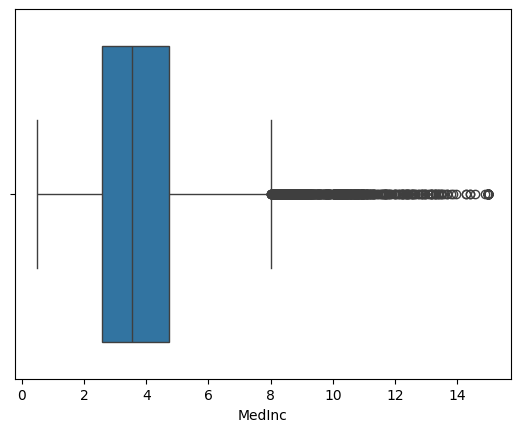

In [ ]:
sns.boxplot(x=df['MedInc'])

<Axes: xlabel='HouseAge'>

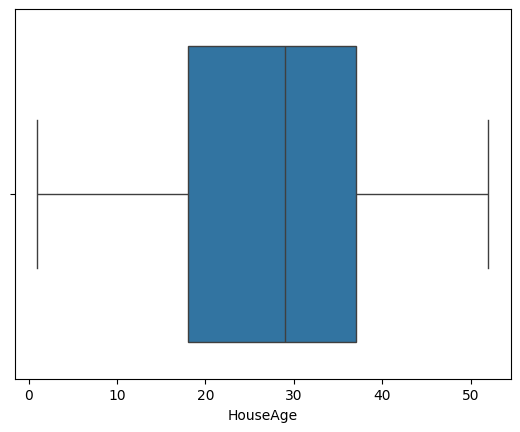

In [ ]:
sns.boxplot(x=df['HouseAge'])

<Axes: xlabel='AveRooms'>

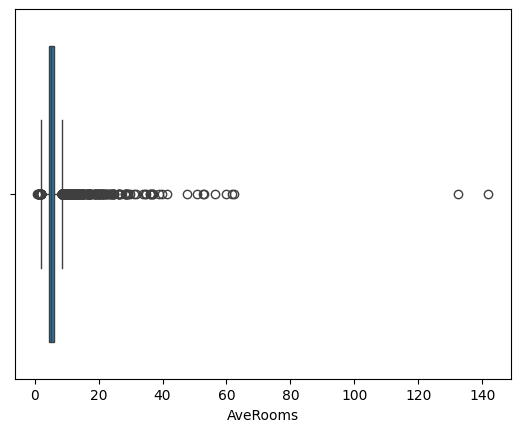

In [ ]:
sns.boxplot(x=df['AveRooms'])

<Axes: xlabel='AveBedrms'>

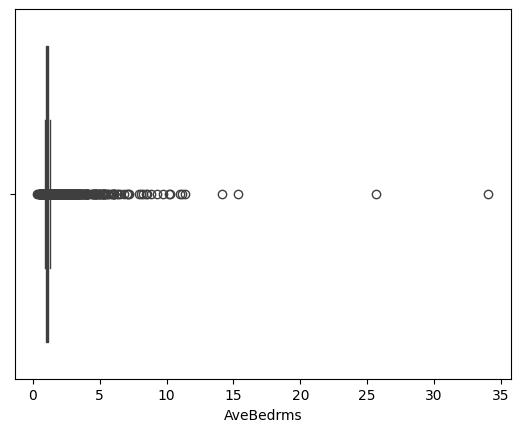

In [ ]:
sns.boxplot(x=df['AveBedrms'])

<Axes: xlabel='Population'>

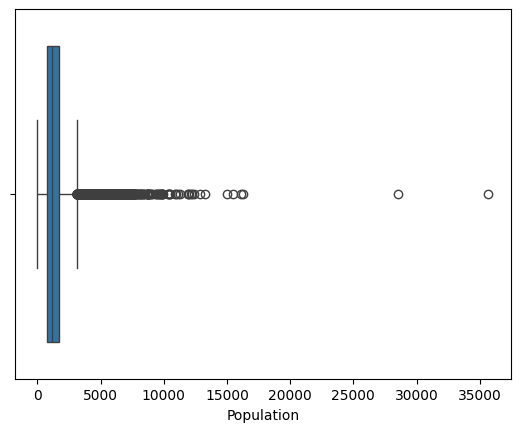

In [ ]:
sns.boxplot(x=df['Population'])

<Axes: xlabel='AveOccup'>

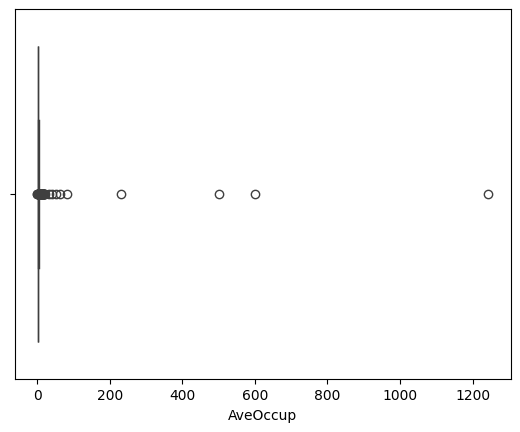

In [ ]:
sns.boxplot(x=df['AveOccup'])

<Axes: xlabel='MedHouseVal'>

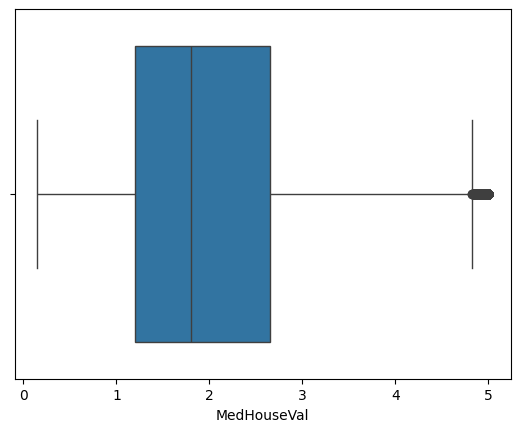

In [ ]:
sns.boxplot(x=df['MedHouseVal'])

<Axes: xlabel='DistanceToLA'>

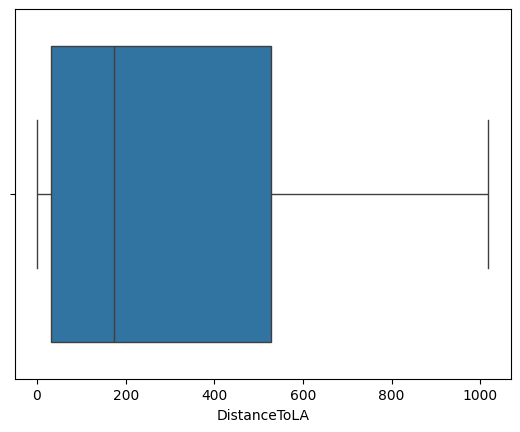

In [ ]:
sns.boxplot(x=df['DistanceToLA'])

Setelah dilakukan visualisasi pada setiap variabel, ditemukan bahwa terdapat outlier pada variabel MedInc, AveRooms, AveBedrms, Population, AveOccup, dan MedHouseVal. Maka dari itu, kita akan melakukan teknik winsorizing, yaitu mengubah nilai outlier menjadi nilai ambang atas atau ambang bawah, sehingga tidak mengurangi data yang sudah ada.

In [ ]:
# Ambil hanya kolom numerikal
numeric_cols = df.select_dtypes(include='number').columns

# Hitung Q1, Q3, dan IQR untuk kolom numerikal
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Terapkan winsorizing: batasi nilai-nilai ekstrem
df[numeric_cols] = df[numeric_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

# Cek ukuran dataset (tidak berubah karena tidak menghapus baris)
df.shape

<ipython-input-413-0affebd8b475>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)


(20638, 8)

In [ ]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20638.000000  20638.000000  20638.000000  20638.000000  20638.000000   
mean       3.801305     28.639355      5.304999      1.057939   1336.927803   
std        1.657462     12.584297      1.245913      0.080428    765.560578   
min        0.499900      1.000000      2.023754      0.865918      3.000000   
25%        2.563925     18.000000      4.440930      1.006067    787.000000   
50%        3.534950     29.000000      5.229190      1.048780   1166.000000   
75%        4.743550     37.000000      6.052381      1.099499   1725.000000   
max        8.012988     52.000000      8.469557      1.239648   3132.000000   

           AveOccup   MedHouseVal  DistanceToLA  
count  20638.000000  20638.000000  20638.000000  
mean       2.899792      2.059677    269.437850  
std        0.690958      1.132095    247.650003  
min        1.151584      0.149990      0.921305  
25%        2.429994      1.196000     32.223307  
50%        2.818295      1.797000    173.862825  
75%        3.282267      2.647000    527.034773  
max        4.560676      4.823500   1018.198911

**EDA - Univariate Analysis**

In [ ]:
numerical_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal', 'DistanceToLA']

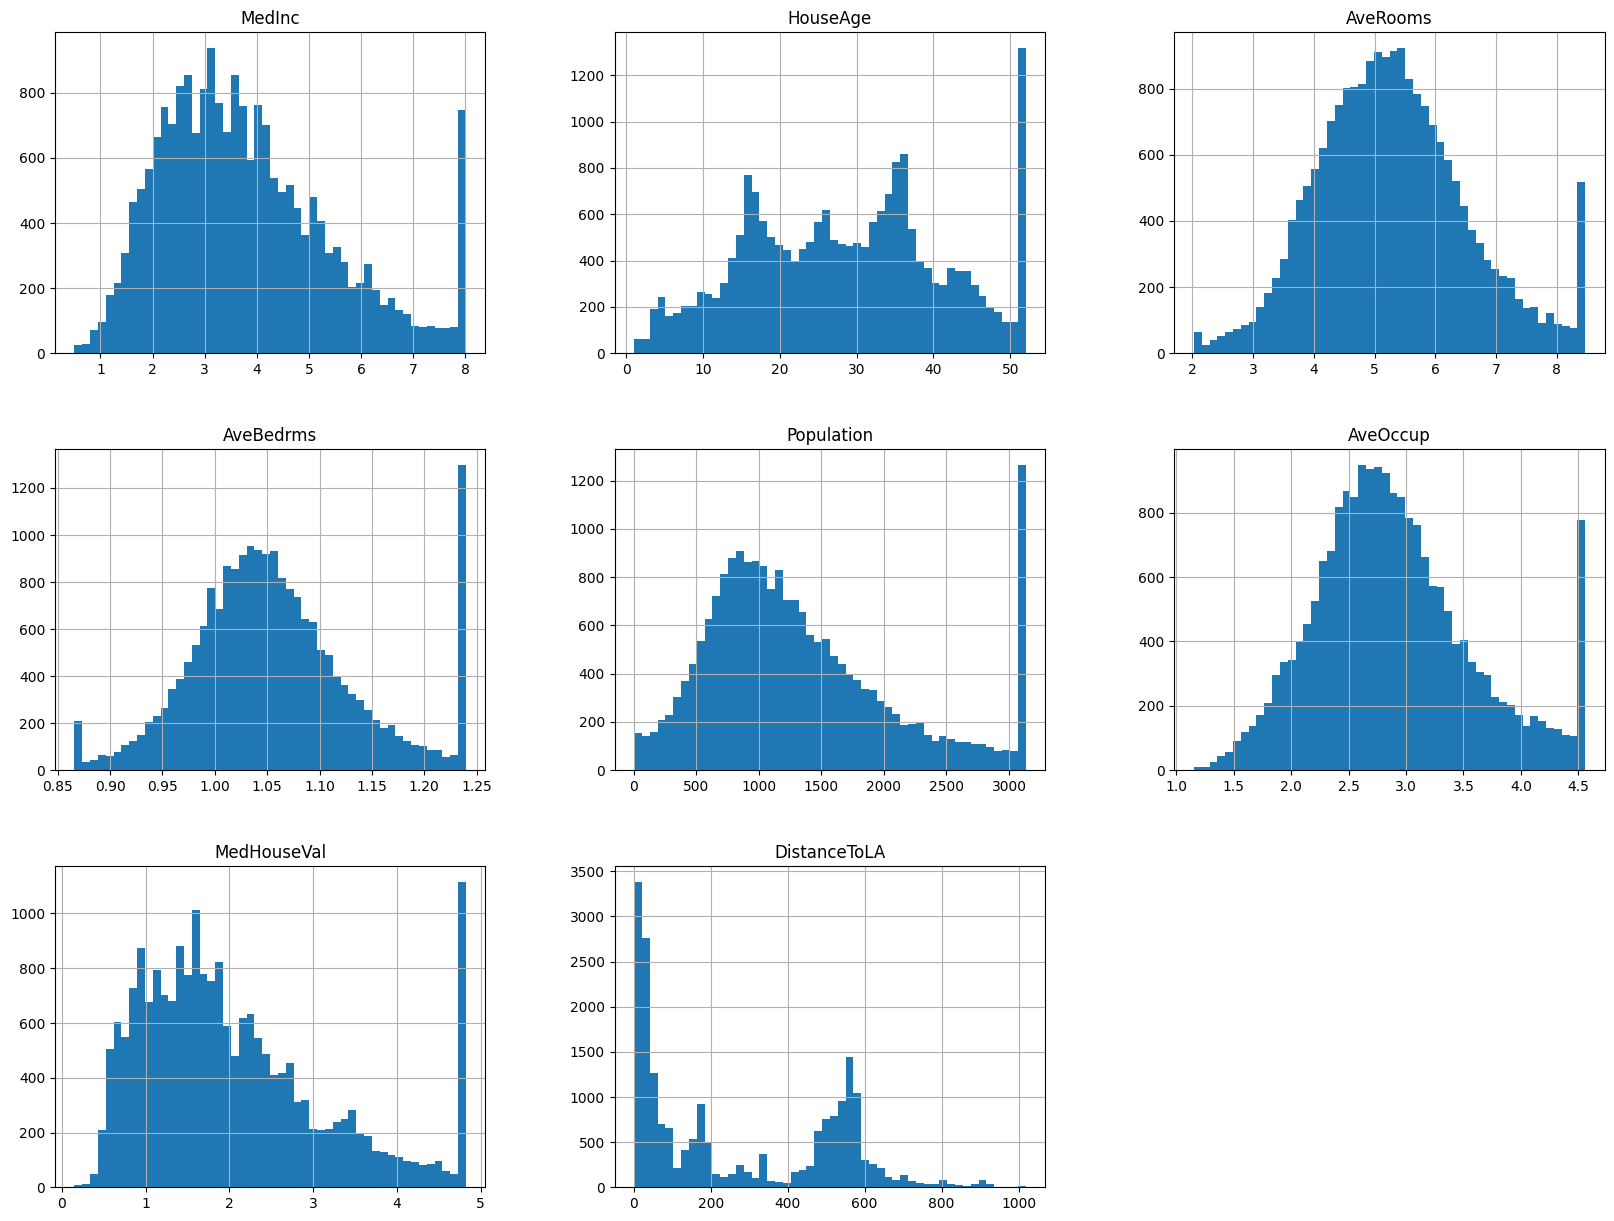

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

**EDA - Multivariate Analysis**

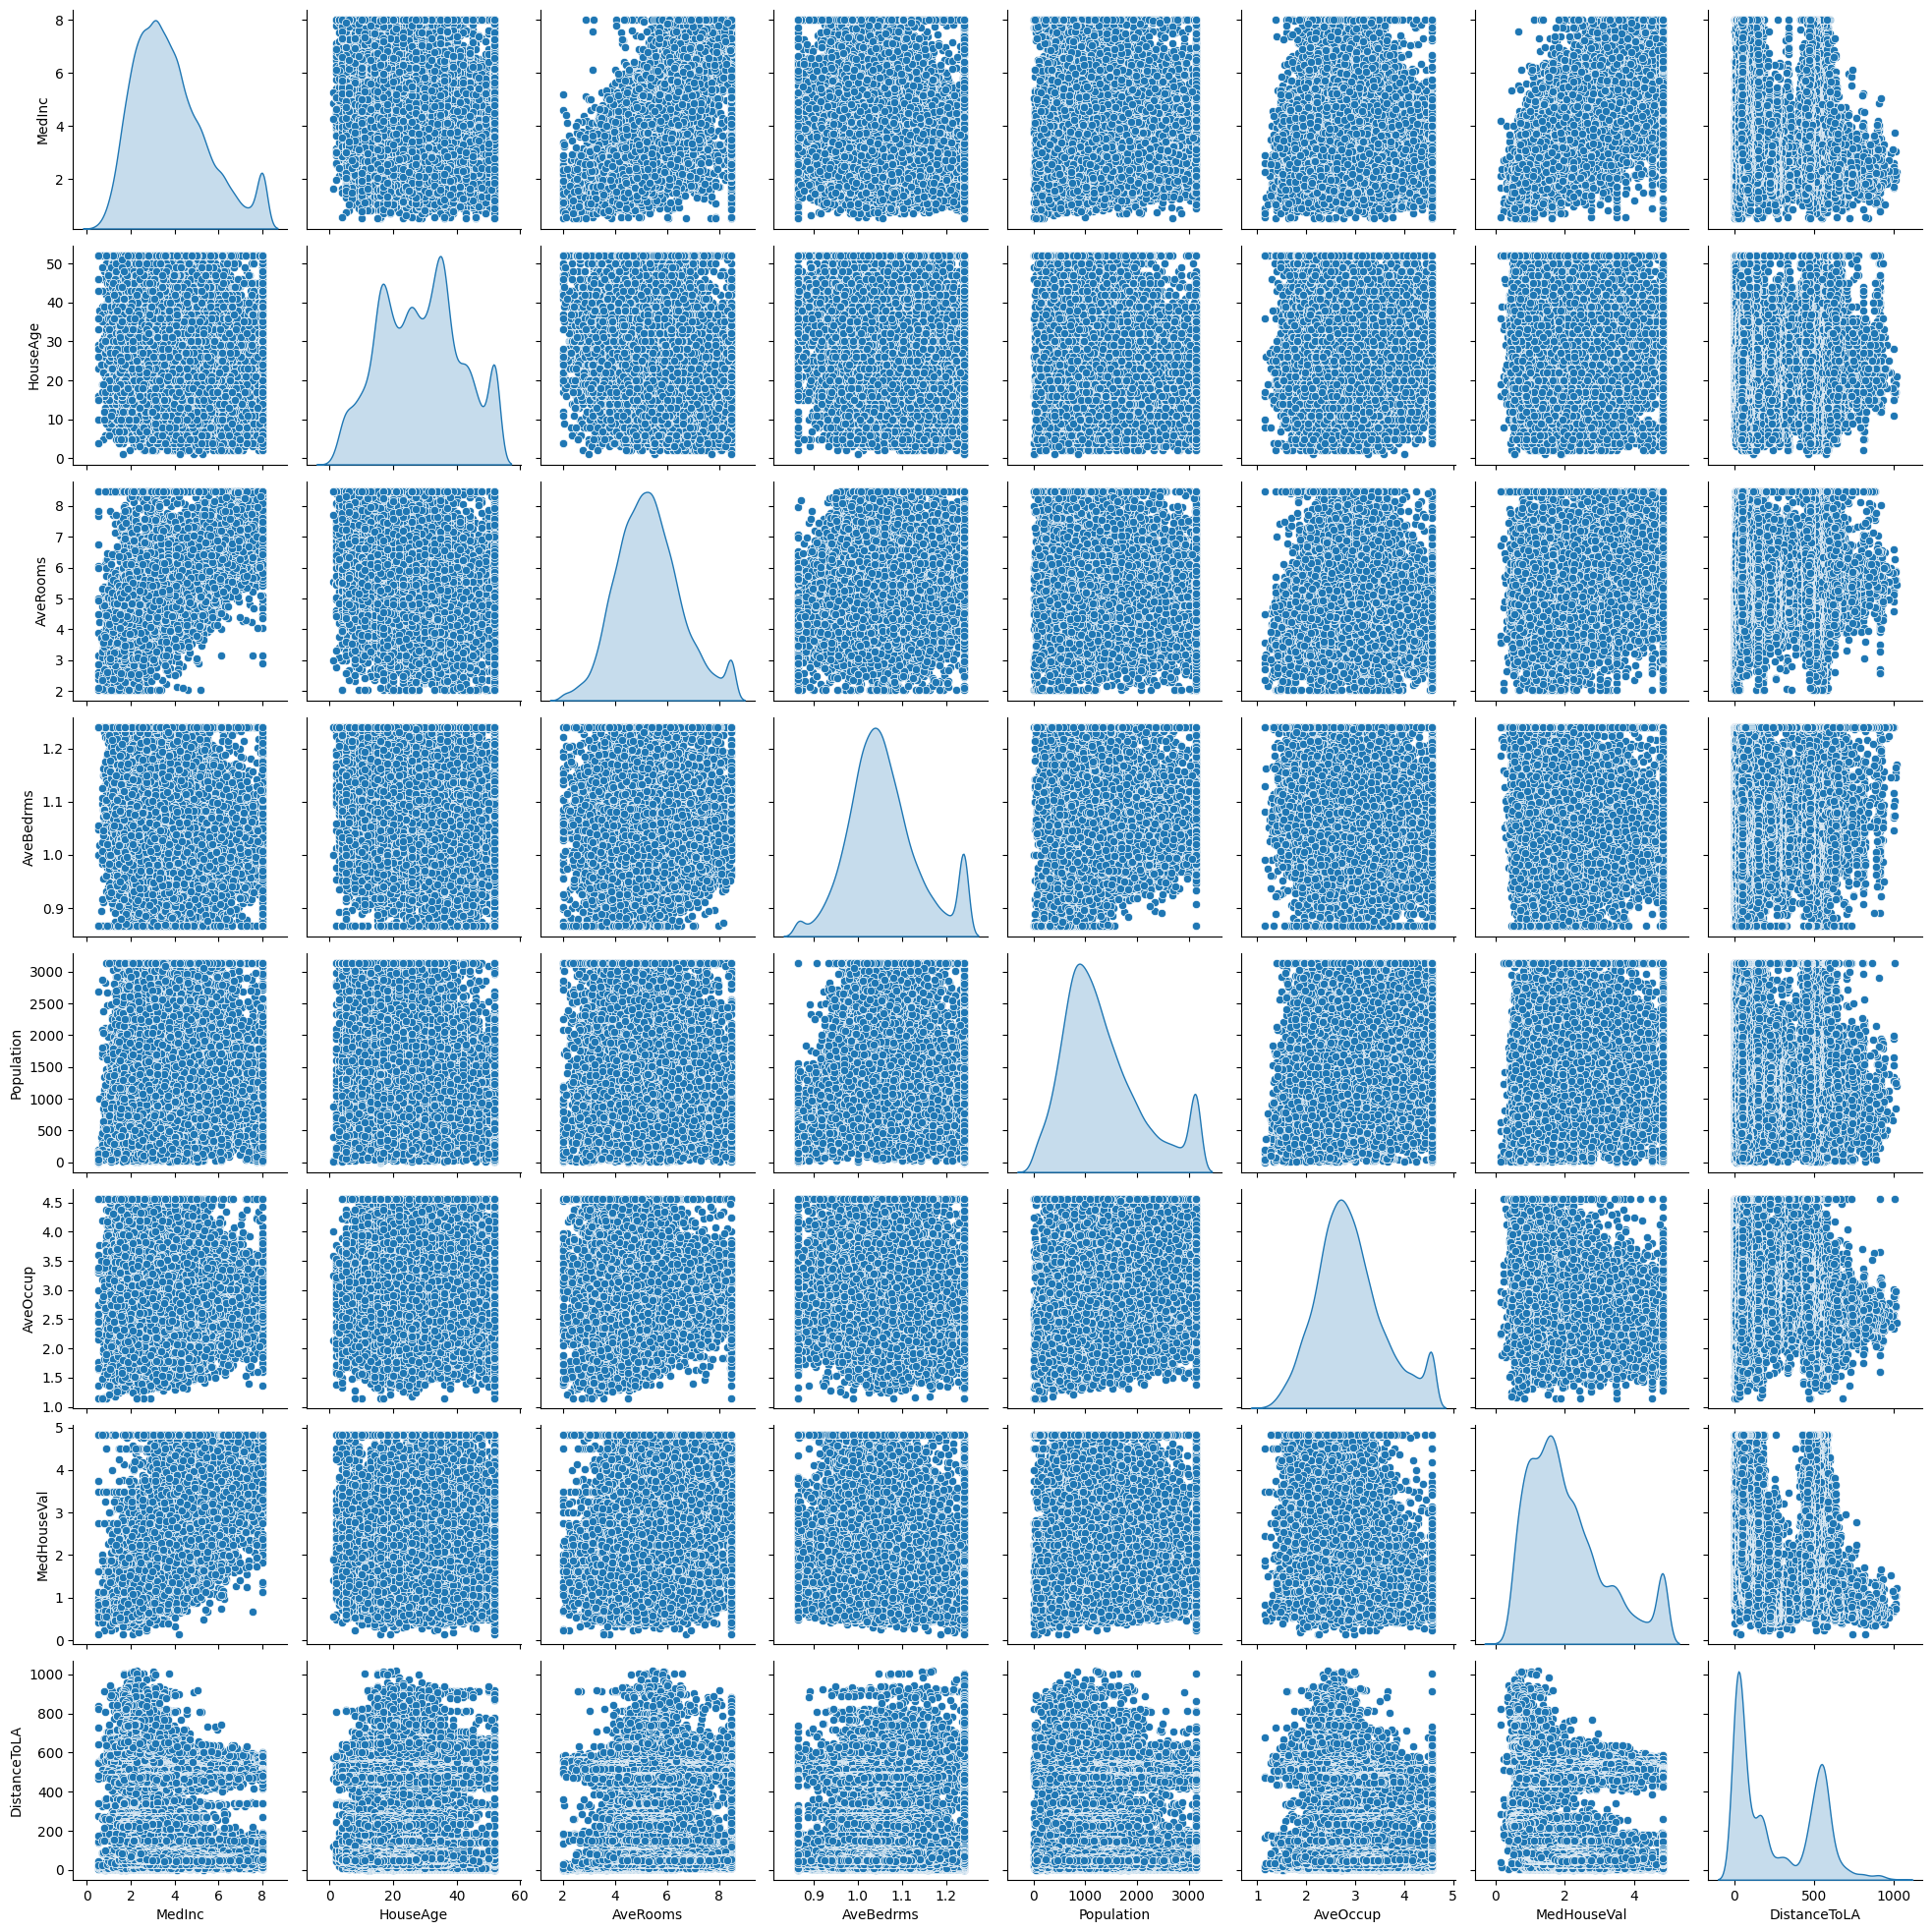

In [ ]:
# Numerical Features to Price
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

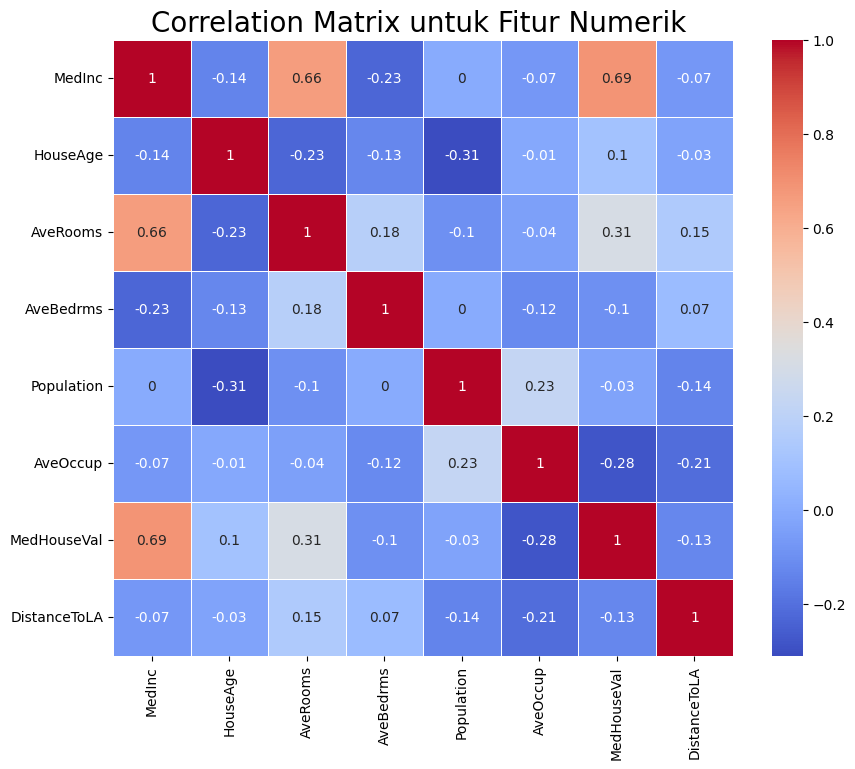

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [ ]:
# Drop kolom Population karena memiliki tingkat korelasi yang sangat rendah
df.drop(['Population'], inplace=True, axis=1)
df.head()

<ipython-input-419-013745af533f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Population'], inplace=True, axis=1)


MedInc  HouseAge  AveRooms  AveBedrms  AveOccup  MedHouseVal  \
0  8.012988      41.0  6.984127   1.023810  2.555556        4.526   
1  8.012988      21.0  6.238137   0.971880  2.109842        3.585   
2  7.257400      52.0  8.288136   1.073446  2.802260        3.521   
3  5.643100      52.0  5.817352   1.073059  2.547945        3.413   
4  3.846200      52.0  6.281853   1.081081  2.181467        3.422   

   DistanceToLA  
0    556.356651  
1    554.106454  
2    554.435067  
3    555.017896  
4    555.017896

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["MedHouseVal"],axis =1)
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 20638
Total # of sample in train dataset: 16510
Total # of sample in test dataset: 4128


**Standardisasi**

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'DistanceToLA']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

MedInc  HouseAge  AveRooms  AveBedrms  AveOccup  DistanceToLA
12843 -0.430618  0.027032  0.106803  -0.948351  0.009791      1.287017
3547   1.108617 -0.847913  0.522028  -0.292077  0.019402     -0.923615
11366  0.993773 -0.291130  0.308669  -0.825237  1.573772     -0.905689
4619  -0.940645 -0.052508 -2.133294   0.039198  0.273145     -1.060346
16428 -0.179669 -1.166075  0.202067   0.250946  0.006959      1.073112

Modelling
---

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
X_train[numerical_features].describe().round(4)

MedInc    HouseAge    AveRooms   AveBedrms    AveOccup  \
count  16510.0000  16510.0000  16510.0000  16510.0000  16510.0000   
mean      -0.0000      0.0000     -0.0000      0.0000      0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000   
min       -1.9864     -2.2001     -2.6294     -2.3873     -2.5302   
25%       -0.7443     -0.8479     -0.6950     -0.6506     -0.6792   
50%       -0.1635      0.0270     -0.0587     -0.1158     -0.1154   
75%        0.5637      0.6634      0.5989      0.5201      0.5515   
max        2.5382      1.8565      2.5422      2.2489      2.4099   

       DistanceToLA  
count    16510.0000  
mean         0.0000  
std          1.0000  
min         -1.0807  
25%         -0.9549  
50%         -0.3863  
75%          1.0405  
max          3.0317

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

**Random Forest**

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

**Boosting Algorithm**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Evaluasi
---

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

train      test
KNN       0.000328  0.000376
RF        0.000076  0.000352
Boosting  0.000536  0.000531

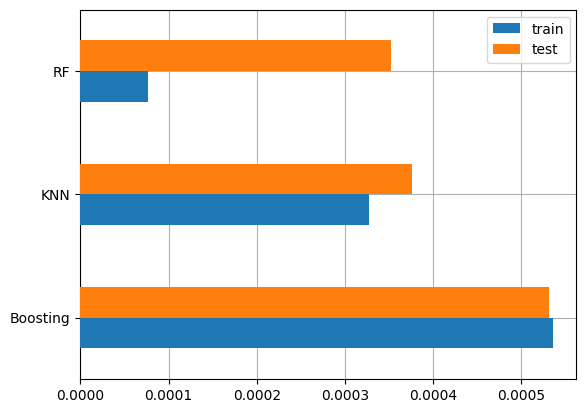

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

y_true  prediksi_KNN  prediksi_RF  prediksi_Boosting
4414   1.743           1.9          2.3                1.8